In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [5]:
from citipy import citipy
#The citipy module finds the nearest city to
#the latitude and longitude pair with a
#population of 500 or more.

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

604

In [7]:
#When you run the code block, you should get slightly more
#than 500 unique cities. If you get fewer than 500,
#increase your size limit on the np.random.uniform()
#function.

In [8]:
#API = Application Programming Interface
#An API call is very similar to navigating to a website.
#An API points to a URL and collects some data from the
#webpage or server.

In [9]:
#When clients request information from our server through
#our website, they are making an API call.
#API key

In [10]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [11]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=012541f2b50b057a69bcf2857299396d


In [12]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=012541f2b50b057a69bcf2857299396d&q=Boston


In [13]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [14]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.06,"lat":42.36},"weather":[{"id":803,"main":"Clouds","description":"broken clouds","icon":"04d"}],"base":"stations","main":{"temp":43.07,"feels_like":26.37,"temp_min":39.99,"temp_max":46,"pressure":1016,"humidity":26},"visibility":16093,"wind":{"speed":19.46,"deg":270,"gust":27.51},"clouds":{"all":75},"dt":1587076349,"sys":{"type":1,"id":3486,"country":"US","sunrise":1587031241,"sunset":1587079602},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [15]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 43.07,
  'feels_like': 26.37,
  'temp_min': 39.99,
  'temp_max': 46,
  'pressure': 1016,
  'humidity': 26},
 'visibility': 16093,
 'wind': {'speed': 19.46, 'deg': 270, 'gust': 27.51},
 'clouds': {'all': 75},
 'dt': 1587076349,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1587031241,
  'sunset': 1587079602},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [16]:
#how to get the weather data from Boston. 
# Create an endpoint URL for a city.
#BOSTON DATA
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 43.07,
  'feels_like': 26.37,
  'temp_min': 39.99,
  'temp_max': 46,
  'pressure': 1016,
  'humidity': 26},
 'visibility': 16093,
 'wind': {'speed': 19.46, 'deg': 270, 'gust': 27.51},
 'clouds': {'all': 75},
 'dt': 1587076349,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1587031241,
  'sunset': 1587079602},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [17]:
#STEP 1
# Import the datetime module from the datetime library.
from datetime import datetime

In [18]:
# Loop through all the cities in our list.
#for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
 #   if (i % 50 == 0 and i >= 50):
  #      set_count += 1
   #     record_count = 1
    # Create endpoint URL with each city.
   # city_url = url + "&q=" + "i"

In [19]:
#When retrieving data from an API, or even when
#scraping a webpage, make sure there is data to parse.
#If not, the script might stop at that moment and not finish
#getting all the data we need.

In [20]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1



# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                            "Lat": city_lat,
                            "Lng": city_lng,
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

    # Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | contamana
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | ilanskiy
Processing Record 4 of Set 1 | soderhamn
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | plettenberg bay
Processing Record 7 of Set 1 | puerto escondido
Processing Record 8 of Set 1 | zabaykalsk
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | port alfred
Processing Record 11 of Set 1 | ilulissat
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | lleida
Processing Record 14 of Set 1 | atuona
Processing Record 15 of Set 1 | hilo
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | san patricio
Processing Record 18 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 19 of Set 1 | khatanga
Processing Record 20 of Set 1 | moyale
Processing Record 21 of Set 1 | rikitea
Processing Record 22 of Set 1 | kal

Processing Record 39 of Set 4 | marzuq
Processing Record 40 of Set 4 | bethel
Processing Record 41 of Set 4 | poso
Processing Record 42 of Set 4 | cayenne
Processing Record 43 of Set 4 | manicore
Processing Record 44 of Set 4 | port lincoln
Processing Record 45 of Set 4 | moose factory
Processing Record 46 of Set 4 | lavrentiya
Processing Record 47 of Set 4 | port macquarie
Processing Record 48 of Set 4 | sofiysk
City not found. Skipping...
Processing Record 49 of Set 4 | bengkulu
Processing Record 50 of Set 4 | muros
Processing Record 1 of Set 5 | sioux lookout
Processing Record 2 of Set 5 | port-gentil
Processing Record 3 of Set 5 | leningradskiy
Processing Record 4 of Set 5 | buraydah
Processing Record 5 of Set 5 | ouango
Processing Record 6 of Set 5 | teupasenti
Processing Record 7 of Set 5 | egvekinot
Processing Record 8 of Set 5 | hithadhoo
Processing Record 9 of Set 5 | bestobe
Processing Record 10 of Set 5 | padang
Processing Record 11 of Set 5 | muktagachha
City not found. Ski

Processing Record 27 of Set 8 | souillac
Processing Record 28 of Set 8 | komsomolskiy
Processing Record 29 of Set 8 | ambilobe
Processing Record 30 of Set 8 | oranjestad
Processing Record 31 of Set 8 | agadez
Processing Record 32 of Set 8 | talakan
Processing Record 33 of Set 8 | hervey bay
Processing Record 34 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 35 of Set 8 | hazorasp
Processing Record 36 of Set 8 | san quintin
Processing Record 37 of Set 8 | lucapa
Processing Record 38 of Set 8 | petionville
Processing Record 39 of Set 8 | honiara
Processing Record 40 of Set 8 | rapid valley
Processing Record 41 of Set 8 | maralal
Processing Record 42 of Set 8 | inirida
Processing Record 43 of Set 8 | anklam
Processing Record 44 of Set 8 | balykshi
City not found. Skipping...
Processing Record 45 of Set 8 | pokrovsk
Processing Record 46 of Set 8 | novikovo
Processing Record 47 of Set 8 | rio gallegos
Processing Record 48 of Set 8 | kawalu
Processing Record 49 of Set 8 

Processing Record 13 of Set 12 | tutoia
Processing Record 14 of Set 12 | samarai
Processing Record 15 of Set 12 | arman
Processing Record 16 of Set 12 | tatui
Processing Record 17 of Set 12 | ahipara
Processing Record 18 of Set 12 | paragominas
Processing Record 19 of Set 12 | qandala
Processing Record 20 of Set 12 | seoul
Processing Record 21 of Set 12 | barguzin
Processing Record 22 of Set 12 | tazovskiy
Processing Record 23 of Set 12 | sao felix do xingu
Processing Record 24 of Set 12 | laguna
Processing Record 25 of Set 12 | umkomaas
Processing Record 26 of Set 12 | mahibadhoo
Processing Record 27 of Set 12 | suslovo
Processing Record 28 of Set 12 | dokka
Processing Record 29 of Set 12 | riachao das neves
Processing Record 30 of Set 12 | auki
Processing Record 31 of Set 12 | zwedru
Processing Record 32 of Set 12 | altay
Processing Record 33 of Set 12 | avigliano
Processing Record 34 of Set 12 | fort smith
Processing Record 35 of Set 12 | rawson
Processing Record 36 of Set 12 | burg

In [21]:
#print(city_data)

In [22]:
#After collecting all our data, we can
#tally the number of cities in the city_data array
#of dictionaries using the len() function.

In [23]:
#Create a DataFrame of City Weather Data

# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Contamana,-7.33,-75.02,68.11,87,100,2.98,PE,2020-04-16 22:41:40
1,Hermanus,-34.42,19.23,60.01,94,92,2.26,ZA,2020-04-16 22:39:32
2,Ilanskiy,56.24,96.06,37.80,84,98,4.63,RU,2020-04-16 22:41:40
3,Soderhamn,61.30,17.06,37.99,52,8,5.01,SE,2020-04-16 22:41:41
4,Mataura,-46.19,168.86,46.00,95,100,4.00,NZ,2020-04-16 22:39:24


In [24]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]


city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Contamana,PE,2020-04-16 22:41:40,-7.33,-75.02,68.11,87,100,2.98
1,Hermanus,ZA,2020-04-16 22:39:32,-34.42,19.23,60.01,94,92,2.26
2,Ilanskiy,RU,2020-04-16 22:41:40,56.24,96.06,37.80,84,98,4.63
3,Soderhamn,SE,2020-04-16 22:41:41,61.30,17.06,37.99,52,8,5.01
4,Mataura,NZ,2020-04-16 22:39:24,-46.19,168.86,46.00,95,100,4.00
...,...,...,...,...,...,...,...,...,...
551,Hurghada,EG,2020-04-16 22:43:54,27.26,33.81,75.20,41,40,23.04
552,Mehamn,NO,2020-04-16 22:43:54,71.04,27.85,35.31,92,100,17.72
553,Sepolno Krajenskie,PL,2020-04-16 22:43:55,53.45,17.53,43.00,80,30,1.12
554,Martil,MA,2020-04-16 22:43:55,35.62,-5.28,62.60,93,100,3.36


In [25]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [26]:
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

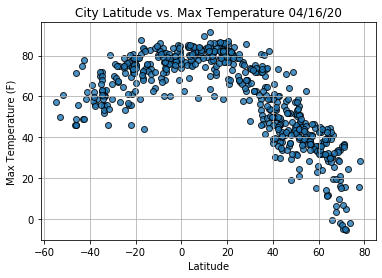

In [28]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

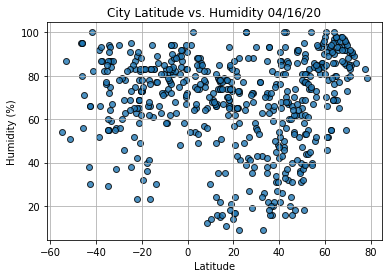

In [29]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

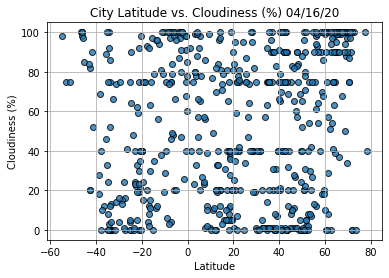

In [30]:

# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

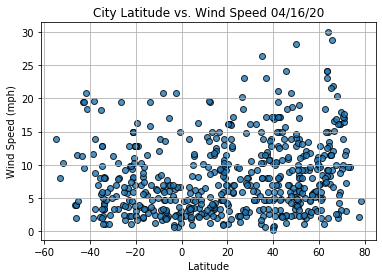

In [31]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [37]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [42]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [44]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Ilanskiy,RU,2020-04-16 22:41:40,56.24,96.06,37.80,84,98,4.63
3,Soderhamn,SE,2020-04-16 22:41:41,61.30,17.06,37.99,52,8,5.01
6,Puerto Escondido,MX,2020-04-16 22:39:29,15.85,-97.07,86.00,79,5,6.93
7,Zabaykalsk,RU,2020-04-16 22:41:41,49.63,117.32,51.37,31,40,3.98
8,Albany,US,2020-04-16 22:35:03,42.60,-73.97,42.80,35,40,14.99
...,...,...,...,...,...,...,...,...,...
551,Hurghada,EG,2020-04-16 22:43:54,27.26,33.81,75.20,41,40,23.04
552,Mehamn,NO,2020-04-16 22:43:54,71.04,27.85,35.31,92,100,17.72
553,Sepolno Krajenskie,PL,2020-04-16 22:43:55,53.45,17.53,43.00,80,30,1.12
554,Martil,MA,2020-04-16 22:43:55,35.62,-5.28,62.60,93,100,3.36


In [45]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

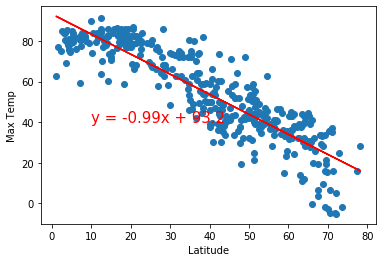

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

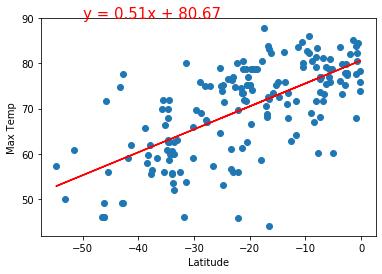

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

In [ ]:
 #You have plotted the regression line and
 #   equation for latitude and maximum temperature
    #for your Northern and Southern Hemispheres.

In [ ]:
#The correlation between the latitude and
#the maximum temperature is strong to very strong
#because the r-value is less than –0.7 for the Northern
#Hemisphere and greater than 0.7 for the Southern Hemisphere,
#as shown by the plots here. This means that as we approach the
#equator, 0° latitude, the temperatures become warmer. And when
#we are further from the equator the temperatures become cooler.
#Check the r-values for your plots. 

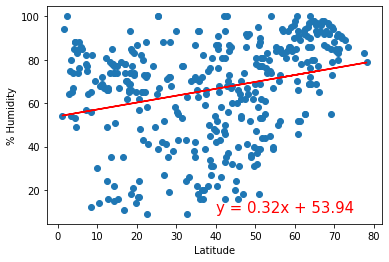

In [54]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

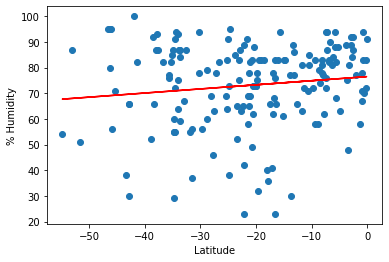

In [59]:
#Equation needs to show up on the graph -- ASK DURING OH
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

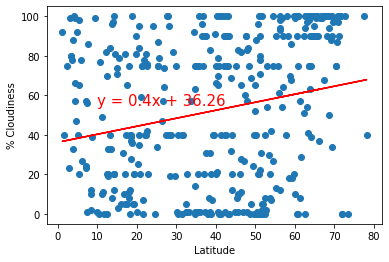

In [63]:
#SKILL DRILL ----> need the slope to be negative
#Equation needs to show up on the graph -- ASK DURING OH
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(10,55))

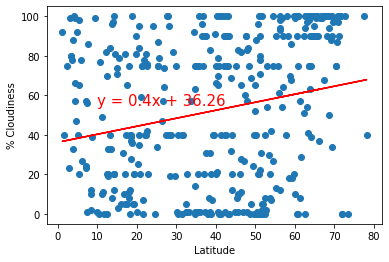

In [65]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(10,55))

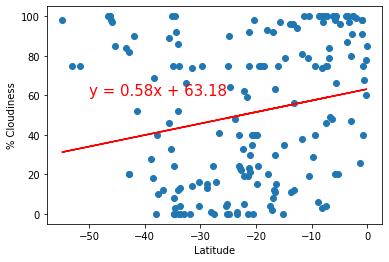

In [67]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

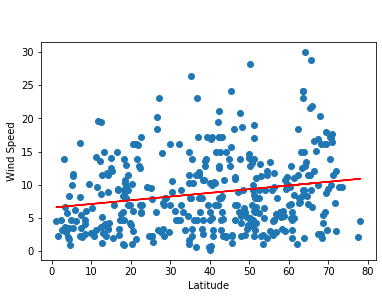

In [69]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

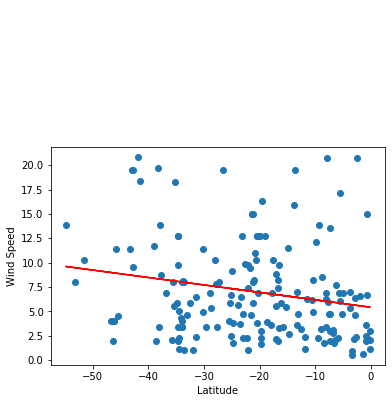

In [71]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))